In [1]:

import os.path as osp
shared_folder = osp.abspath(osp.join('..', '..', 'share'))
import sys
if shared_folder not in sys.path: sys.path.insert(1, shared_folder)
from notebook_utils import NotebookUtilities
nu = NotebookUtilities(
    data_folder_path=osp.abspath(osp.join('..', 'data')),
    saves_folder_path=osp.abspath(osp.join('..', 'saves'))
)

# Import needed libraries
%pprint
import os, re
import pandas as pd
import platform
import sys
# import tensorflow
# import datetime
sys.path.insert(1, osp.abspath('../py'))

Pretty printing has been turned OFF


In [2]:

file_sizes = {}
for file_name in nu.list_dfs_in_folder():
    file_path = os.path.join(nu.saves_pickle_folder, file_name)
    file_size = os.path.getsize(f'{file_path}.pkl')
    file_sizes[file_name] = file_size
print()
for (k, v) in sorted([(k, v) for k, v in file_sizes.items()], key=lambda x: x[1], reverse=True)[:6]:
    print(f"{k} = nu.load_object('{k}')")


world_map_df = nu.load_object('world_map_df')
freedom_df = nu.load_object('freedom_df')
RoL_df = nu.load_object('RoL_df')
governance_df = nu.load_object('governance_df')
geo_fips_df = nu.load_object('geo_fips_df')
income_df = nu.load_object('income_df')


In [3]:

RoL_df = nu.load_object('RoL_df')
mask_series = RoL_df['Country Name'].map(lambda x: 'gaza' in str(x).lower())
df = RoL_df[mask_series]
df = df.sample(min(10, df.shape[0])).dropna(axis='columns', how='all').T
df.sample(min(20, df.shape[0]))

,7568,7590,7562,7580,7591,7589,7595,7560,7578,7566
2006 [YR2006],17.07317,-0.434555,44.87805,15.68627,8.0,0.353608,0.168744,-0.298329,-1.013073,-0.968531
2014 [YR2014],34.13462,-0.881765,49.51923,59.13462,5.0,0.271365,0.171391,-0.277772,0.208703,-0.487887
2013 [YR2013],26.54029,-0.928262,49.2891,56.39811,7.0,0.227864,0.152174,-0.252065,0.122458,-0.725638
2015 [YR2015],37.5,-0.985836,40.38462,55.76923,5.0,0.257834,0.168939,-0.453332,0.102855,-0.473844
Country Name,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza
2007 [YR2007],13.59223,-0.677934,54.85437,11.65049,8.0,0.340329,0.165767,-0.112384,-1.195622,-1.101114
2009 [YR2009],29.1866,-0.953672,55.98086,46.41148,8.0,0.217713,0.161701,-0.104716,-0.209156,-0.670464
Series Name,Government Effectiveness: Percentile Rank,Voice and Accountability: Estimate,Control of Corruption: Percentile Rank,Regulatory Quality: Percentile Rank,Voice and Accountability: Number of Sources,Rule of Law: Standard Error,Voice and Accountability: Standard Error,Control of Corruption: Estimate,Regulatory Quality: Estimate,Government Effectiveness: Estimate
2005 [YR2005],13.23529,-0.653497,39.02439,16.17647,6.0,0.328595,0.22016,-0.491559,-1.055032,-1.055691
Country Code,PSE,PSE,PSE,PSE,PSE,PSE,PSE,PSE,PSE,PSE


In [4]:

from stats_scraping_utils import StatsScrapingUtilities
from stats_charting_utils import StatsChartingUtilities

ssu = StatsScrapingUtilities(s=nu)
scu = StatsChartingUtilities(s=nu)


----

In [5]:

data_txt_folder = osp.join(nu.data_folder, 'txt'); os.makedirs(name=data_txt_folder, exist_ok=True)
file_path = osp.join(data_txt_folder, 'idb5yr.txt')
idb5yr_df = pd.read_csv(file_path, sep='|')

In [6]:

print(idb5yr_df.columns.tolist()[:10])
df = idb5yr_df.sample(min(10, idb5yr_df.shape[0])).dropna(axis='columns', how='all').T
df.sample(min(20, df.shape[0]))

['#YR', 'GEO_ID', 'AREA_KM2', 'ASFR15_19', 'ASFR20_24', 'ASFR25_29', 'ASFR30_34', 'ASFR35_39', 'ASFR40_44', 'ASFR45_49']


,14889,9778,4502,7401,32656,28453,5041,15003,17556,8664
POP70_74,139589.0,3064.0,65188.0,NaN,3521156.0,1430.0,1081258.0,50120.0,NaN,58866.0
FPOP0_4,92986.0,1789.0,23022.0,NaN,3551086.0,14821.0,875946.0,362759.0,NaN,33432.0
MEDAGE_F,38.5,43.2,49.5,NaN,36.8,18.5,40.9,19.8,NaN,43.1
MPOP80_84,31077.0,469.0,25324.0,NaN,372314.0,325.0,277613.0,5570.0,NaN,7683.0
MPOP10_14,102542.0,2028.0,25886.0,NaN,4386655.0,12993.0,1021242.0,325445.0,NaN,34038.0
#YR,2041,2064,2073,1952,2030,2015,2008,2004,1990,2007
GEO_ID,W140000WOJM,W140000WOFM,W140000WOBT,W140000WOCZ,W140000WOVN,W140000WOST,W140000WOCA,W140000WOJO,W140000WOLK,W140000WOEE
DEATHS,24838.0,394.0,12038.0,NaN,671769.0,1430.0,238617.0,22793.0,NaN,17409.0
IMR,7.25,7.58,6.61,NaN,12.33,51.2,5.08,25.14,NaN,5.35
POP15_19,200872.0,4053.0,52382.0,NaN,8205614.0,21919.0,2219465.0,580894.0,NaN,97271.0


In [7]:

tables_url = 'https://api.census.gov/data/timeseries/idb/5year/variables.html'
page_tables_list = nu.get_page_tables(tables_url)

[(0, (123, 9))]


In [8]:

labels_df = page_tables_list[0].copy()
label_dict = labels_df.set_index('Name').Label
mask_series = labels_df.Name.map(lambda x: 'genc' in str(x).lower())
labels_df[mask_series].T

,50
Name,GENC
Label,Geography
Concept,NaN
Required,not required
Attributes,NaN
Limit,0
Predicate Type,(not a predicate)
Group,NaN
Unnamed: 8,NaN


In [9]:

# Find out if there even is a GENC column
mask_series = idb5yr_df.columns.map(lambda x: 'GENC' in str(x).upper())
for column_name in idb5yr_df.columns[mask_series]:
    
    # Try to find the Gaza Strip designation in the GENC column
    mask_series = idb5yr_df[column_name].map(lambda x: 'XG' in str(x).upper())
    if idb5yr_df[mask_series].shape[0]: display(idb5yr_df[mask_series].T)
    
    # Get the unique values in the GENC column
    else: print(idb5yr_df[column_name].unique().tolist())

In [15]:

# url = 'https://en.wikipedia.org/wiki/Demographics_of_the_State_of_Palestine'
url = 'https://www.census.gov/data-tools/demo/idb/#/pop'
url += '?COUNTRY_YEAR=2023'
url += '&COUNTRY_YR_ANIM=2023'
url += '&region_mgr=!A:Gaza%20Strip:XG'
url += '&menu=popViz'
url += '&CCODE_SINGLE=XG'
url += '&popPages=BYAGE'
url += '&CCODE=XG'
url += '&ageGroup=5Y'
page_soup = nu.get_page_soup(url, verbose=True)
for span_soup in page_soup.find_all('span', {'ref': 'eText', 'class': 'ag-header-cell-text'}):
    print(span_soup.text.strip())

Getting soup object for: https://www.census.gov/data-tools/demo/idb/#/pop?COUNTRY_YEAR=2023&COUNTRY_YR_ANIM=2023&region_mgr=!A:Gaza%20Strip:XG&menu=popViz&CCODE_SINGLE=XG&popPages=BYAGE&CCODE=XG&ageGroup=5Y


In [13]:

columns_list = ['Age Group (Years of Age)', 'Male Population', 'Female Population']
renamed_columns = ['age_group', 'male_population', 'female_population']
year = 2023
df = nu.load_csv(csv_name=f'gaza_5year_populations_by_sex_{year}').rename(columns={c: r for c, r in zip(columns_list, renamed_columns)})
# display(df[renamed_columns])
row_dict = {}
AGE85PLUS_MALE = 0
AGE85PLUS_FEM = 0
for (age_group, male_population, female_population), _ in df.groupby(renamed_columns):
    age_group_str = re.sub(r'\D+', '', age_group)
    male_population = int(re.sub(r'\D+', '', male_population))
    female_population = int(re.sub(r'\D+', '', female_population))
    if (int(age_group_str) > 8084):
        AGE85PLUS_MALE += male_population
        AGE85PLUS_FEM += female_population
    else:
        column_name = f'AGE{age_group_str}'
        row_dict[f'{column_name}_MALE_{year}PE'] = male_population
        row_dict[f'{column_name}_FEM_{year}PE'] = female_population
row_dict[f'AGE85PLUS_MALE_{year}PE'] = AGE85PLUS_MALE
row_dict[f'AGE85PLUS_FEM_{year}PE'] = AGE85PLUS_FEM
sample1_df = pd.DataFrame([row_dict])
sample1_df['County_Name'] = ''
sample1_df['State_Name'] = 'Gaza Strip'

In [35]:

columns_list = ['GROUP', 'Male Population', 'Female Population']
renamed_columns = ['age_group', 'male_population', 'female_population']
year = 2023
df = nu.load_csv(csv_name=f'israel_5year_populations_by_sex_{year}').rename(columns={c: r for c, r in zip(columns_list, renamed_columns)})
# display(df[renamed_columns[1:]])
row_dict = {}
AGE85PLUS_MALE = 0
AGE85PLUS_FEM = 0
for (age_group, male_population, female_population), _ in df.groupby(renamed_columns):
    age_group_str = re.sub(r'\D+', '', age_group)
    if age_group_str:
        if (int(age_group_str) > 8084):
            AGE85PLUS_MALE += male_population
            AGE85PLUS_FEM += female_population
        else:
            column_name = f'AGE{age_group_str}'
            row_dict[f'{column_name}_MALE_{year}PE'] = male_population
            row_dict[f'{column_name}_FEM_{year}PE'] = female_population
row_dict[f'AGE85PLUS_MALE_{year}PE'] = AGE85PLUS_MALE
row_dict[f'AGE85PLUS_FEM_{year}PE'] = AGE85PLUS_FEM
sample2_df = pd.DataFrame([row_dict])
sample2_df['County_Name'] = ''
sample2_df['State_Name'] = 'Israel'

In [31]:

sample_df = pd.concat([sample1_df, sample2_df], ignore_index=True)


# Visualize the Pyramids

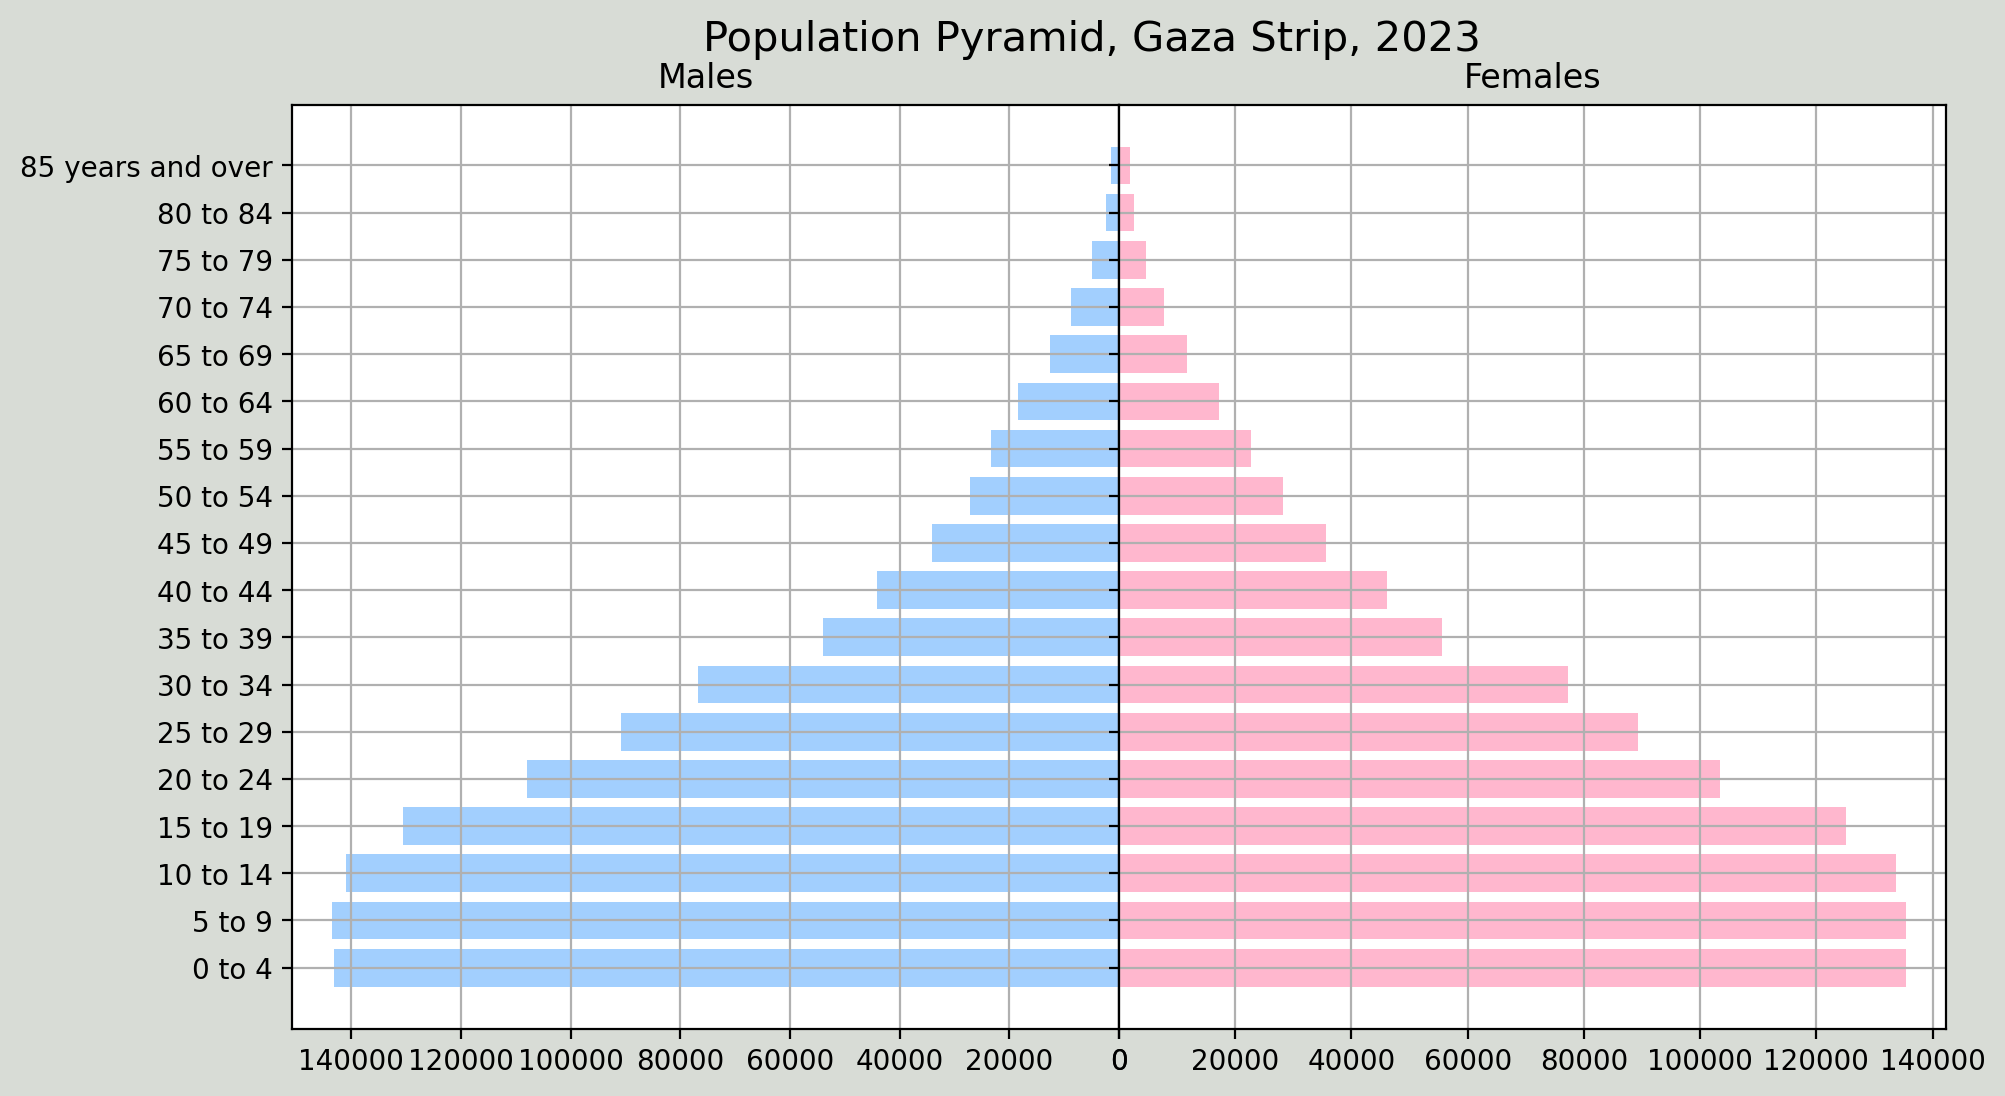

In [32]:

mask_series = (sample_df.State_Name == 'Gaza Strip')
fig = scu.population_pyramid(sample_df[mask_series], year=2023)

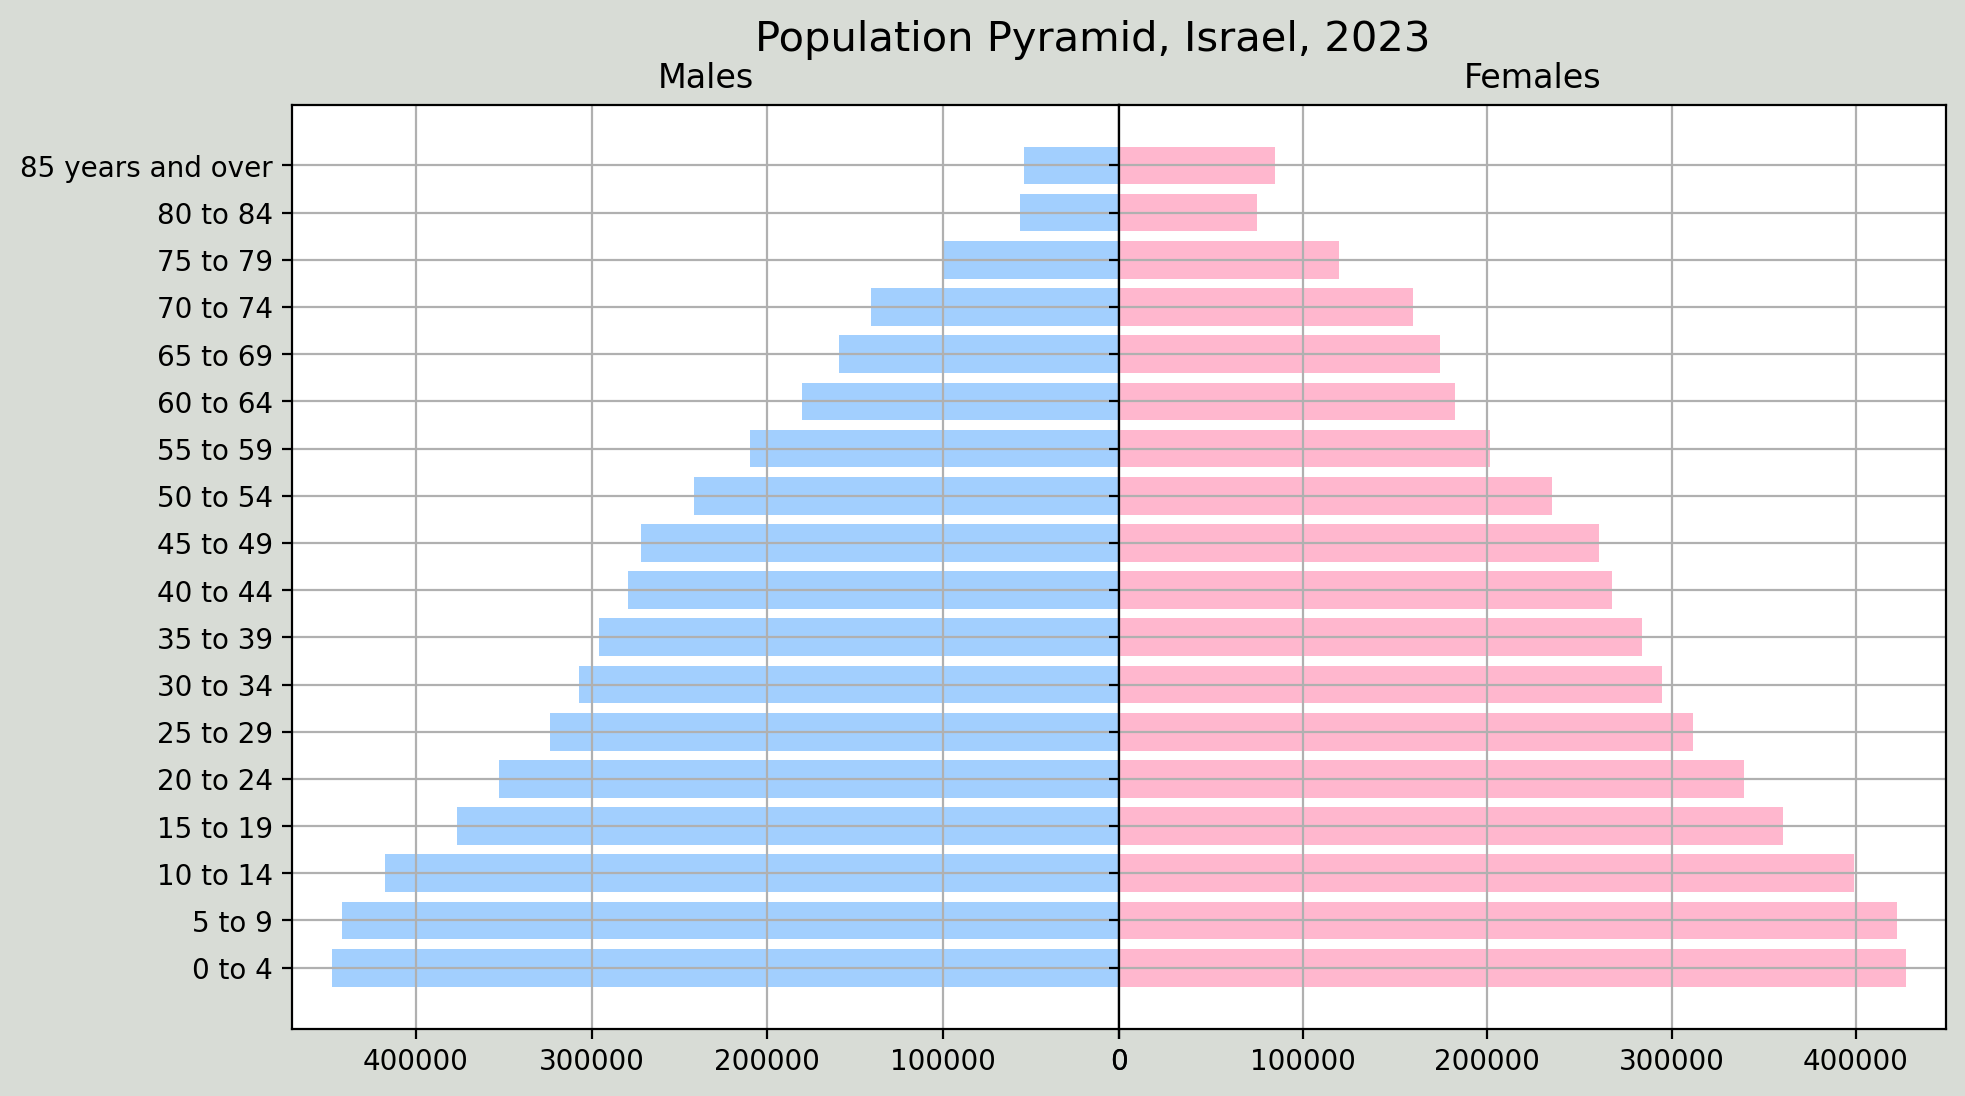

In [34]:

mask_series = (sample_df.State_Name == 'Israel')
female_xticks_list = [i * 100_000 for i in range(5)]
fig = scu.population_pyramid(sample_df[mask_series], year=2023, show=True, female_xticks_list=female_xticks_list, verbose=False)